13.1 Zastosuj metodę LeaveOneOut cross validation do zbioru Iris, analogicznie do przeprowadzonej analizy podczas lekcji używając do tego pętli.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Wczytanie zbioru danych Iris
iris = load_iris()
X = iris.data
y = iris.target

# Tworzenie instancji LeaveOneOut
loo = LeaveOneOut()

# Lista na przechowanie wynikĂłw
accuracies = []

# PÄtla przeprowadzajÄca LeaveOneOut cross-validation
for train_index, test_index in loo.split(X):
    # PodziaĹ danych na zbiĂłr treningowy i testowy
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Trening modelu SVM
    model = SVC()
    model.fit(X_train, y_train)

    # Predykcja
    y_pred = model.predict(X_test)

    # Obliczenie dokĹadnoĹci
    accuracies.append(accuracy_score(y_test, y_pred))

# Obliczenie Ĺredniej dokĹadnoĹci
mean_accuracy = np.mean(accuracies)
mean_accuracy

0.9666666666666667

13.2
- Dla caĹoĹci danych Iris (4 featury) zbadaj jak na model wpĹynie zmiana kryterium nieczystoĹci z gini na entropy (criterion).
- Narysuj drzewa.
- Oblicz samodzielnie wartoĹci gini i entropy w wybranym wÄĹşle.
- Narysuj granice decyzyjne dla drzewa decyzyjnego i regresji logistycznej - w tym celu wybierz podzbiĂłr danych iris iris.data[:,:2].

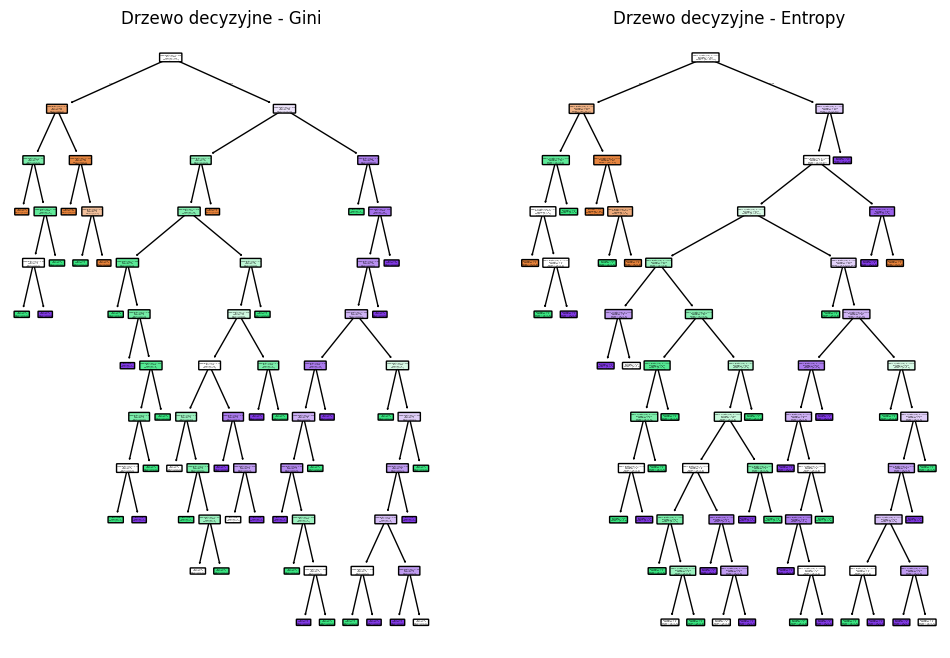

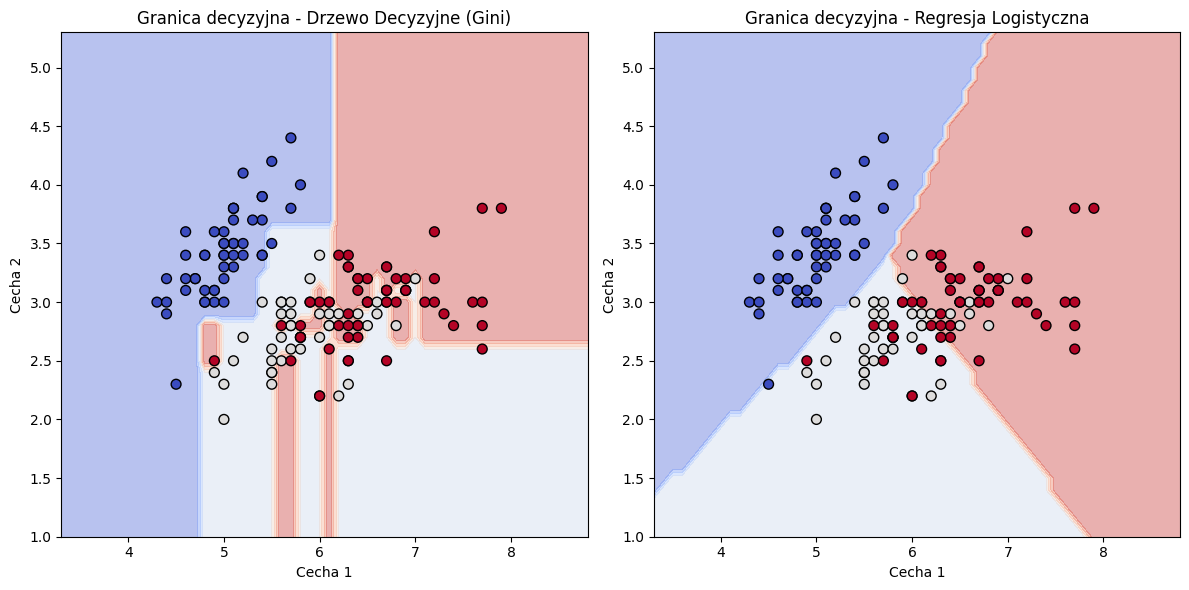

(0.6666666666666666, 0.6444444444444445, 1.0, 0)

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Wczytanie zbioru danych Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tylko pierwsze 2 cechy
y = iris.target

# PodziaĹ na zbiĂłr treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Zmiana kryterium z Gini na Entropy
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Trening modeli
dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)

# Predykcje
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

# Obliczenie dokĹadnoĹci
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# 2. Rysowanie drzew
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plot_tree(dt_gini, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names, rounded=True)
plt.title("Drzewo decyzyjne - Gini")

plt.subplot(1, 2, 2)
plot_tree(dt_entropy, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names, rounded=True)
plt.title("Drzewo decyzyjne - Entropy")

plt.show()

# 3. Obliczanie Gini i Entropy dla przykĹadowego wÄzĹa
def gini_impurity(y):
    """Obliczanie indeksu Gini dla zbioru etykiet."""
    m = len(y)
    return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

def entropy(y):
    """Obliczanie entropii dla zbioru etykiet."""
    m = len(y)
    return -sum((np.sum(y == c) / m) * np.log2(np.sum(y == c) / m) for c in np.unique(y))

# Wybieramy przykĹadowy wÄzeĹ, np. 0 (pierwszy wÄzeĹ w drzewie Gini)
y_node_gini = y_train[dt_gini.apply(X_train) == 0]  # WÄzeĹ 0 w drzewie Gini

# Obliczamy Gini i Entropy dla tego wÄzĹa
gini_value = gini_impurity(y_node_gini)
entropy_value = entropy(y_node_gini)

# 4. Rysowanie granic decyzyjnych dla drzewa decyzyjnego i regresji logistycznej
# Trening regresji logistycznej
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Zakres wartoĹci dla osi x i y
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Tworzymy siatkÄ punktĂłw do wyrysowania granic decyzyjnych
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predykcja dla kaĹźdego punktu na siatce
Z_tree = dt_gini.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logreg = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Zmieniamy Z na odpowiedni format dla wykresu
Z_tree = Z_tree.reshape(xx.shape)
Z_logreg = Z_logreg.reshape(xx.shape)

# Rysowanie granic decyzyjnych
plt.figure(figsize=(12, 6))

# Wykres granicy decyzyjnej drzewa decyzyjnego
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_tree, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.title("Granica decyzyjna - Drzewo Decyzyjne (Gini)")
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')

# Wykres granicy decyzyjnej regresji logistycznej
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_logreg, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.title("Granica decyzyjna - Regresja Logistyczna")
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')

plt.tight_layout()
plt.show()

# Wyniki
accuracy_gini, accuracy_entropy, gini_value, entropy_value

13.3

- Wczytaj zbiĂłr load_breast_cancer dostÄpny w sklearn.datasets. (UWAGA! w tym przypadku nie da siÄ juĹź zwizualizowaÄ za pomocÄ decision_regions)
- Przeanalizuj dane.
- Podziel zbiĂłr na treningowy i testowy w proporcjach 7:3.
- Wytrenuj model DecisionTreeClassifier bez przycinania.
- SprawdĹş accuracy na zbiorze treningowym i testowym.
- Narysuj drzewo.
- Wytrenuj 1 model.
- SprawdĹş istotnoĹÄ zmiennych dla najlepszego modelu.

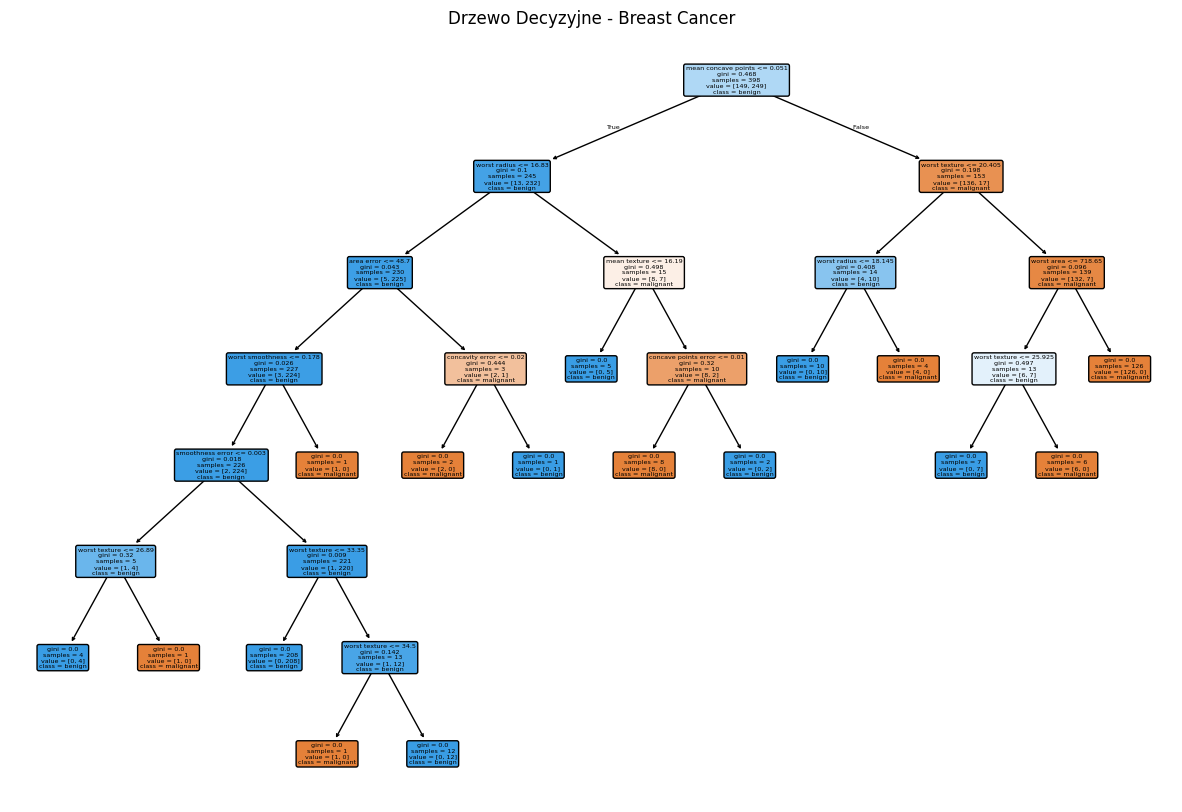

(1.0,
 0.9415204678362573,
 array([0.        , 0.02288528, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70583856, 0.        , 0.        ]))

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# 1. Wczytanie zbioru danych Breast Cancer
data = load_breast_cancer()
X = data.data
y = data.target

# 2. PodziaĹ na zbiĂłr treningowy i testowy w proporcjach 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Wytrenowanie modelu DecisionTreeClassifier bez przycinania
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 4. Obliczenie accuracy na zbiorze treningowym i testowym
train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
test_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

# 5. Narysowanie drzewa
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.title("Drzewo Decyzyjne - Breast Cancer")
plt.show()

# 6. IstotnoĹÄ zmiennych
feature_importances = dt_model.feature_importances_

# Wyniki
train_accuracy, test_accuracy, feature_importances[:10]  # WyĹwietlamy top 10 waĹźniejszych cech

13.4

- WykreĹl zaleĹźnoĹÄ miÄdzy min_samples_leaf i max_depth a dokĹadnoĹciÄ na zbiorze testowym.
- UĹźyj poniĹźszego zestawu danych generowanego przez funkcjÄ datasets.make_moons.
- Do oceny dokĹadnoĹci uĹźyj metody .score().

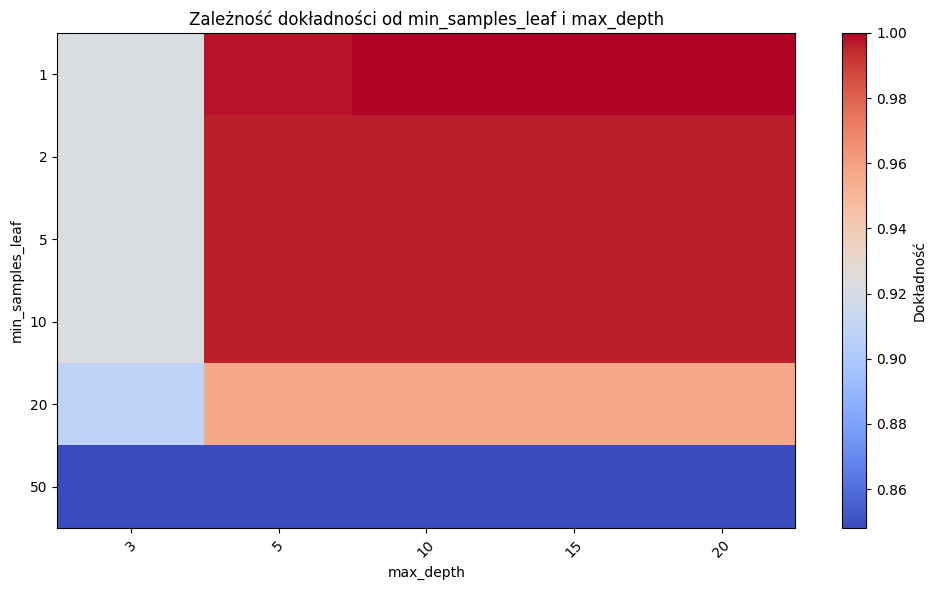

In [7]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# 1. Generowanie danych make_moons
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# 2. Inicjalizacja parametrĂłw dla min_samples_leaf i max_depth
min_samples_leaf_values = [1, 2, 5, 10, 20, 50]
max_depth_values = [3, 5, 10, 15, 20]

# 3. Tworzenie siatki dla min_samples_leaf i max_depth
accuracy_results = np.zeros((len(min_samples_leaf_values), len(max_depth_values)))

# 4. Trening modeli i obliczanie dokĹadnoĹci
for i, min_samples in enumerate(min_samples_leaf_values):
    for j, max_depth in enumerate(max_depth_values):
        model = DecisionTreeClassifier(min_samples_leaf=min_samples, max_depth=max_depth, random_state=42)
        model.fit(X, y)
        accuracy_results[i, j] = model.score(X, y)

# 5. Rysowanie wykresu zaleĹźnoĹci dokĹadnoĹci od min_samples_leaf i max_depth
plt.figure(figsize=(10, 6))
plt.imshow(accuracy_results, interpolation='nearest', cmap='coolwarm', aspect='auto')
plt.colorbar(label="DokĹadnoĹÄ")
plt.xticks(np.arange(len(max_depth_values)), max_depth_values, rotation=45)  # Zmiana 'labelrotation' na 'rotation'
plt.yticks(np.arange(len(min_samples_leaf_values)), min_samples_leaf_values)
plt.xlabel("max_depth")
plt.ylabel("min_samples_leaf")
plt.title("ZaleĹźnoĹÄ dokĹadnoĹci od min_samples_leaf i max_depth")
plt.tight_layout()
plt.show()